In [1]:
import sys
from pathlib import Path

# 确保能 import eval_tools (根据你 notebook 位置调整)
PROJECT_ROOT = Path("/home/jhuang52/Projects/metaRL_merged").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from eval_tools.model_a.model_a_functions import (
    load_json, resolve_cfg_paths,
    sample_gus_outside_buildings,
    predict_uavs_for_gus,
    visualize_scene_3d,
    generate_gu_trajectory_csv,
    load_gu_trajectory_csv,
    visualize_trajectory_with_model,
)

cfg_path = "/home/jhuang52/Projects/metaRL_merged/inner_loop/model_a/configs/raleigh_modelA.json"
# model_path = "/home/jhuang52/Projects/metaRL_merged/inner_loop/model_a/runs/modelA_sb3/SAC_20260126_041006/sac_final.zip"

# above is trained with the old weird-4-BSs, below is the new one, which contains only 1 BSs in the highest building in the scene.
model_path = "/home/jhuang52/Projects/metaRL_merged/inner_loop/model_a/runs/modelA_sb3/SAC_20260128_171021/sac_final.zip"

2026-01-29 17:21:52.515006: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-29 17:21:52.550243: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/jhuang52/miniconda3/envs/modelA_sb3/lib/python3.11/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  wa

GU sample attempts: 170
Invalid UAV count: 0
[scene] cfg_path = /home/jhuang52/Projects/metaRL_merged/inner_loop/model_a/configs/raleigh_modelA.json
[scene] scene_xml = /home/jhuang52/Projects/metaRL_merged/scenarios/raleigh_scene/raleigh_union_square.xml
[scene] buildings.boxes_json = /home/jhuang52/Projects/metaRL_merged/scenarios/raleigh_buildings.json


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

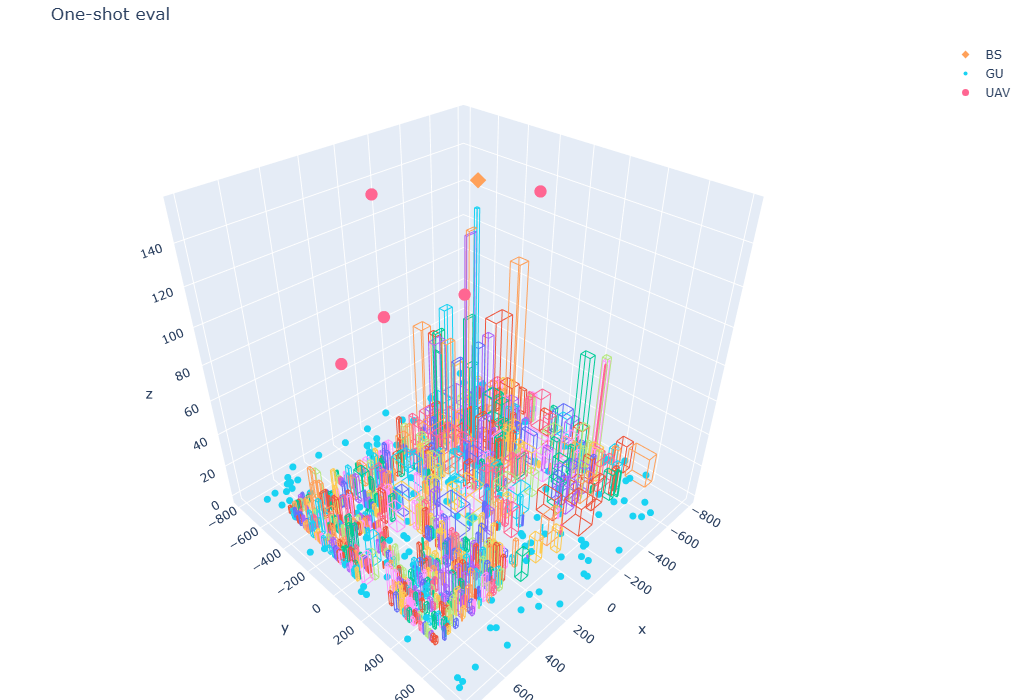

In [2]:
import numpy as np

cfg = resolve_cfg_paths(load_json(cfg_path))
rng = np.random.default_rng(0)

gu_xyz, attempts = sample_gus_outside_buildings(cfg, rng, margin=2.0)  # soft margin
pred = predict_uavs_for_gus(cfg_path, model_path, gu_xyz, deterministic=True, seed=0)

print("GU sample attempts:", attempts)
print("Invalid UAV count:", pred["invalid_uav_count"])

fig = visualize_scene_3d(cfg_path, gu_xyz=gu_xyz, uav_xyz=pred["uav_xyz"], title="One-shot eval", use_scene_cube=False)
fig


In [ ]:
# try to generate GU positions for future evaluation

In [3]:
gu_traj = load_gu_trajectory_csv(csv_path)
visualize_trajectory_with_model(cfg_path, model_path, gu_traj, deterministic=True, seed=0

SyntaxError: incomplete input (4001878596.py, line 2)